# Week 2
# Rasika Bhalerao

# Agenda
- Jupyter notebooks for this class
  - colab.research.google.com
  - Adding Markdown and Python cells
  - Running the notebook
    - Run, cut, copy, delete cells
    - Submitted notebook should run from scratch! Test it with Runtime --> Restart and run all
  - Submitting: download as .ipynb and submit on ISVC
- Useful Python packages
 - pandas, matplotlib, sklearn
- How to start data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns

# This tells matplolib not to try opening a new window for each plot
%matplotlib inline

In [ ]:
# Example dataset: tweets from top 20 most followed Twitter users
# (https://dataverse.harvard.edu/dataset.xhtml?id=3047332)

df = pd.read_csv('tweets.csv')
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [ ]:
for user in set(df['author']):
  print(user)

KimKardashian
Cristiano
jtimberlake
cnnbrk
jimmyfallon
instagram
britneyspears
selenagomez
ArianaGrande
ddlovato
Twitter
rihanna
ladygaga
shakira
katyperry
TheEllenShow
justinbieber
YouTube
BarackObama
taylorswift13


In [ ]:
for tweet in df[df['author']=='Twitter']['content'][:10]:
  print(tweet)
  print()

@ashley_ardinger We shall dub thee: “Meme Master Ashley"

@wakandaho https://t.co/4LYgd60MC6

@ashley_ardinger Meme of the week goes to you. 🏆 https://t.co/gsjBzfDFM8

@MaggyTheBrave What a time it’s been. Happy 10 year, and here’s to many more! 😍

@itsqueenlena You got a pet giraffe?!

@rizahmmed Or is it... https://t.co/pDBup4kfFS

https://t.co/5lUMHzkIZw

#DayOne traditions continue.

Watch the #Inauguration parade LIVE.
https://t.co/lWghuqKB5t

#DayOne begins right now.

The 45th U.S. Presidential #Inauguration is streaming LIVE.

https://t.co/cXqjEOQqZn

Today marks #DayOne.

The 45th U.S. Presidential #Inauguration streams LIVE at 11am ET, right here on Twitter.

https://t.co/cXqjEOQqZn



52542


(array([  580.,  1275.,  1493.,  2818.,  5370.,  5664.,  8042., 13081.,
        13674.,   545.]),
 array([1.26112176e+18, 1.28622668e+18, 1.31133161e+18, 1.33643653e+18,
        1.36154146e+18, 1.38664638e+18, 1.41175130e+18, 1.43685623e+18,
        1.46196115e+18, 1.48706608e+18, 1.51217100e+18]),
 <a list of 10 Patch objects>)

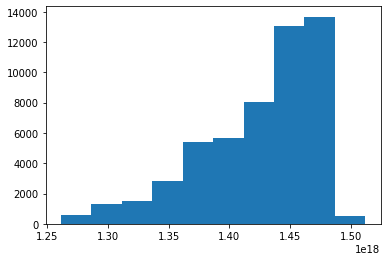

In [ ]:
print(len(df))
df['timestamp'] = pd.to_datetime(df['date_time']).astype(int)
plt.hist(df['timestamp'])

In [ ]:
# Example problem: predict author given number of likes and number of shares

# Let's use only 3 authors for this
num_labels = 3
chosen_labels = np.random.choice(list(set(df['author'])), num_labels, replace=False)
df_simpler = df.loc[df['author'].isin(chosen_labels)]

# Set up train and test sets
X = df_simpler[['number_of_likes', 'timestamp']]
label_encoder = preprocessing.LabelEncoder()
Y = label_encoder.fit_transform(df_simpler['author'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(len(x_train))
print(len(x_test))
print(X.head(10))
print(set(Y))

5535
1384
      number_of_likes            timestamp
2924           282747  1484596800000000000
2925           131905  1484512560000000000
2926           397426  1501568880000000000
2927            83681  1498894680000000000
2928           256578  1496348880000000000
2929            79430  1496348820000000000
2930           125534  1496277240000000000
2931            99133  1483212960000000000
2932           277911  1483165380000000000
2933            73808  1482954780000000000
{0, 1, 2}


In [ ]:
# Train model and test accuracy

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

# How would you use k-fold cross validation here?
# Answer: Do kfold cross validation on the training set to determine
# the best value for the n_neighbors hyperparameter - rotate through,
# using a different 1/k chunk of the training set as the dev set. Do this
# over k folds, and each time, find the number of neighbors that maximizes
# the score on the dev set. After all k folds are done, use the n_neighbors
# that yielded the best score over all folds, and use that as the
# n_neighbors in the final model that you use for the real test set!

0.740606936416185


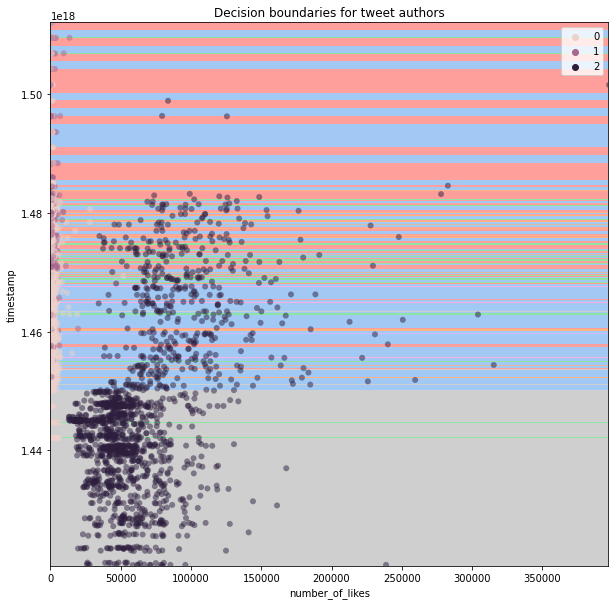

In [ ]:
# Plot train set

# Predictions on the whole space
x_min, x_max = X['number_of_likes'].min(), X['number_of_likes'].max()
y_min, y_max = X['timestamp'].min(), X['timestamp'].max()
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 1000),
    np.arange(y_min, y_max, 100000000000000)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the predictions on the space
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(
    xx, yy, Z,
    colors=sns.color_palette(palette='pastel', n_colors=num_labels, as_cmap=True)
)

# Plot the train set
sns.scatterplot(
    x=x_train['number_of_likes'],
    y=x_train['timestamp'],
    hue=y_train,
    hue_order=sns.color_palette(palette='bright', n_colors=num_labels, as_cmap=True),
    alpha=0.5, edgecolor="none",
    legend='full'
)

# Title, axis labels, legend
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision boundaries for tweet authors')
plt.xlabel('number_of_likes')
plt.ylabel('timestamp')
plt.show()


As we can see in the graph above, since timestamps are such huge numbers, the decision boundaries are dominated by it! Number of likes doesn't even matter, and the classification is based entirely on timestamp. The way to fix this would be to normalize the data so the two variables are on the same scale.